<a href="https://colab.research.google.com/github/Aditya6500/Insurance-Premium-Prediction/blob/main/Insurance_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


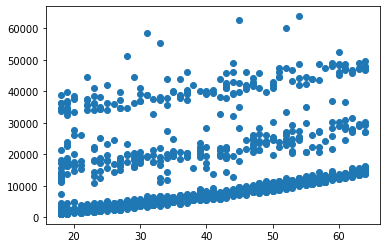

In [30]:
%matplotlib inline
plt.scatter(df.age,df.charges)

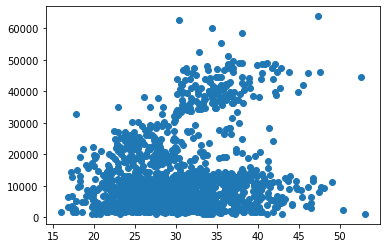

In [31]:
plt.scatter(df.bmi,df.charges)

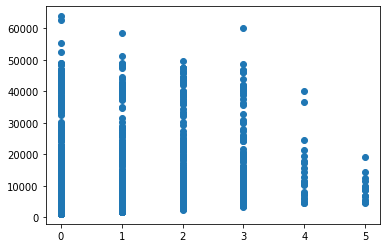

In [32]:
plt.scatter(df.children,df.charges)

# New Section

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df['sex']=df['sex'].replace(['male'],1)
df['sex']=df['sex'].replace(['female'],0)
df['male']=df['sex']

In [66]:
df['smoker']=df['smoker'].replace(['yes'],1)
df['smoker']=df['smoker'].replace(['no'],0)
df['female']=[1 if x==0 else 0 for x in df['sex']]
df['northwest']=[1 if x=='northwest' else 0 for x in df['region']]
df['northeast']=[1 if x=='northeast' else 0 for x in df['region']]
df['southwest']=[1 if x=='southwest' else 0 for x in df['region']]
df['southeast']=[1 if x=='southeast' else 0 for x in df['region']]
df

,age,sex,bmi,children,smoker,region,charges,male,female,northwest,notrtheast,southwest,southeast,northeast
0,19,0,27.900,0,1,southwest,16884.92400,0,1,0,0,1,0,0
1,18,1,33.770,1,0,southeast,1725.55230,1,0,0,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,1,0,0,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,1,0,0,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,0,1,0,0,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,0,1,0,1,0,0,1
1335,18,0,36.850,0,0,southeast,1629.83350,0,1,0,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,1,0,0,1,0,0


In [75]:
x=df[['age','bmi','smoker','southeast','southwest','northeast','northwest','male','female']]
y=df['charges']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [78]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [79]:
reg.coef_

array([ 2.57044161e+02,  3.48906764e+02,  2.35090571e+04, -3.40721713e+02,
       -3.01099996e+02,  6.43203273e+02, -1.38156413e+00,  3.24720905e+01,
       -3.24720905e+01])

In [80]:
reg.intercept_

-12364.068951010202

In [81]:
reg.score(x_test,y_test)

0.7793461952788908